In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=10,n_redundant=5,n_informative=5,n_classes=2,random_state=1)

In [56]:
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train=train_test_split(X,y,test_size=0.3,random_state=1)

In [57]:
X_train.shape,X_test.shape

((300, 10), (700, 10))

In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [59]:
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
y_pred=model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(Y_test,y_pred)

array([[273,  84],
       [ 76, 267]])

In [62]:
accuracy_score(Y_test,y_pred)

0.7714285714285715

In [63]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       357
           1       0.76      0.78      0.77       343

    accuracy                           0.77       700
   macro avg       0.77      0.77      0.77       700
weighted avg       0.77      0.77      0.77       700



In [64]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=model.predict_proba(X_test)[:,1]

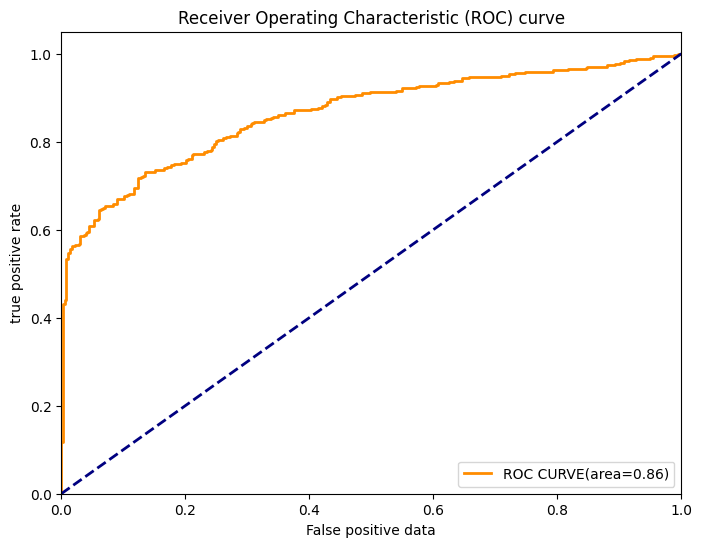

In [65]:
fpr,tpr,thresholds=roc_curve(Y_test,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',linewidth=2,label='ROC CURVE(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive data')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


C:\Users\bhask\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


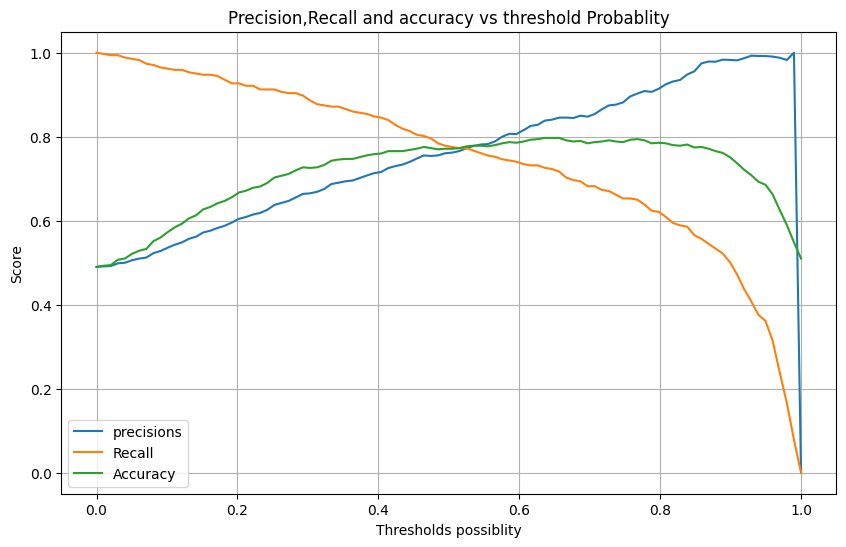

In [67]:
from sklearn.metrics import precision_score,accuracy_score,recall_score
thresholds=np.linspace(0,1,100)
precisions=[]
recalls=[]
accuracies=[]
for threshold in thresholds:
    Y_pred_threshold=(y_pred_proba>=threshold).astype(int)
    precision=precision_score(Y_test,Y_pred_threshold)
    recall=recall_score(Y_test,Y_pred_threshold)
    accuracy=accuracy_score(Y_test,Y_pred_threshold)
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)
plt.figure(figsize=(10,6))
plt.plot(thresholds,precisions,label='precisions')
plt.plot(thresholds,recalls,label='Recall')
plt.plot(thresholds,accuracies,label='Accuracy')
plt.xlabel('Thresholds possiblity')
plt.ylabel('Score')
plt.title('Precision,Recall and accuracy vs threshold Probablity')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
new_pred_levels=np.where(y_pred_proba>0.6,1,0)

In [75]:
new_pred_levels

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,

In [76]:
confusion_matrix(Y_test,new_pred_levels)

array([[298,  59],
       [ 90, 253]])

In [77]:
accuracy_score(Y_test,new_pred_levels)

0.7871428571428571

In [79]:
print(classification_report(Y_test,new_pred_levels))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       357
           1       0.81      0.74      0.77       343

    accuracy                           0.79       700
   macro avg       0.79      0.79      0.79       700
weighted avg       0.79      0.79      0.79       700



In [80]:
from sklearn.model_selection import KFold
cv=KFold(n_splits=5)

In [81]:
cv

KFold(n_splits=5, random_state=None, shuffle=False)

In [83]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(model,X_train,Y_train,cv=cv)
print(acc)

[0.78333333 0.78333333 0.81666667 0.86666667 0.8       ]


In [85]:
print(np.mean(acc))

0.8099999999999999
